In [1]:
from optim import *
from collections import OrderedDict
import plotly.express as px
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
tickers = list(pd.read_excel("portfolioTickers.xlsx")["highCorrelationPortfolio"])
prices = yf.download(tickers, period = "10y", progress = False)["Close"]
prices

YF.download() has changed argument auto_adjust default to True


Ticker,AEE,AEP,CMS,D,DTE,DUK,ED,ES,EVRG,LNT
Date,,,,,,,,,,
2015-04-27,30.950951,40.372822,25.837801,47.441776,49.679443,51.570148,42.783981,35.674679,26.844587,22.621122
2015-04-28,31.231520,40.631664,25.934134,47.552914,49.923355,51.964985,43.186237,36.082832,27.082273,22.789608
2015-04-29,30.891886,40.428810,25.771109,47.265274,49.569660,51.609638,43.054470,35.810722,26.914501,22.621119
2015-04-30,30.227390,39.785179,25.141293,46.859955,48.557423,51.043720,42.686878,34.915627,26.320282,22.148626
2015-05-01,30.419357,39.897114,25.378393,46.873024,48.831833,51.260887,42.763180,35.008717,26.369217,22.346407
...,...,...,...,...,...,...,...,...,...,...
2025-04-21,96.480003,105.529999,72.099998,52.060001,131.779999,120.169998,110.959999,56.380001,66.949997,59.290001
2025-04-22,99.150002,108.150002,73.699997,53.400002,135.800003,122.529999,113.300003,58.049999,68.360001,61.029999
2025-04-23,98.629997,107.019997,73.500000,53.330002,136.160004,121.419998,112.519997,57.959999,68.110001,61.230000


In [3]:
returns = prices.pct_change().dropna()
returns

Ticker,AEE,AEP,CMS,D,DTE,DUK,ED,ES,EVRG,LNT
Date,,,,,,,,,,
2015-04-28,0.009065,0.006411,0.003728,0.002343,0.004910,0.007656,0.009402,0.011441,0.008854,0.007448
2015-04-29,-0.010875,-0.004993,-0.006286,-0.006049,-0.007085,-0.006838,-0.003051,-0.007541,-0.006195,-0.007393
2015-04-30,-0.021510,-0.015920,-0.024439,-0.008575,-0.020421,-0.010965,-0.008538,-0.024995,-0.022078,-0.020887
2015-05-01,0.006351,0.002813,0.009431,0.000279,0.005651,0.004255,0.001787,0.002666,0.001859,0.008930
2015-05-04,0.009466,0.005786,0.003212,0.000837,0.006618,0.000770,0.007136,0.009614,0.008218,0.014096
...,...,...,...,...,...,...,...,...,...,...
2025-04-21,-0.021997,-0.020240,-0.011110,-0.020876,-0.013253,-0.013383,-0.010169,-0.018454,-0.020769,-0.024835
2025-04-22,0.027674,0.024827,0.022191,0.025740,0.030505,0.019639,0.021089,0.029620,0.021061,0.029347
2025-04-23,-0.005245,-0.010448,-0.002714,-0.001311,0.002651,-0.009059,-0.006884,-0.001550,-0.003657,0.003277


OrderedDict([('AEE', 0.09906220176480354),
             ('AEP', 0.10224971948265438),
             ('CMS', 0.10168769000052795),
             ('D', 0.09761705384601192),
             ('DTE', 0.10055212099349746),
             ('DUK', 0.10351180691913583),
             ('ED', 0.10596810762997973),
             ('ES', 0.09290781365516551),
             ('EVRG', 0.10327604171460952),
             ('LNT', 0.0931674439936142)])

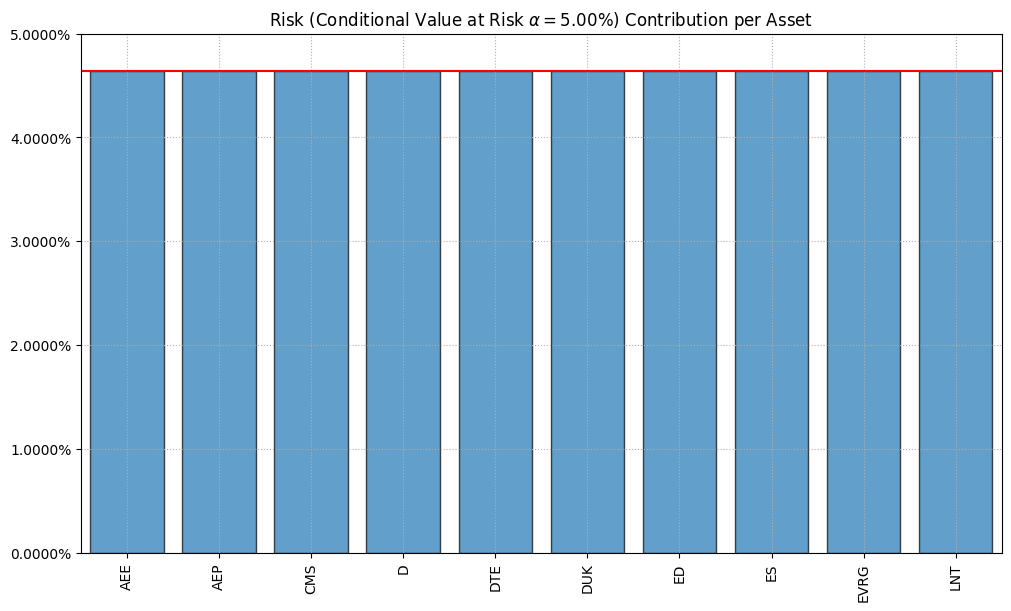

In [4]:
weights, rcPlot = riskParityERC(prices, risk_measure = "CVaR")
weights

In [5]:
rebalancedWeights = weightsRebalancing(weights, returns, rebalance_freq='ME')
rebalancedWeights

Ticker,AEE,AEP,CMS,D,DTE,DUK,ED,ES,EVRG,LNT
Date,,,,,,,,,,
2015-04-28,0.099062,0.102250,0.101688,0.097617,0.100552,0.103512,0.105968,0.092908,0.103276,0.093167
2015-04-29,0.098635,0.102414,0.101719,0.097670,0.100502,0.103486,0.106346,0.092819,0.103317,0.093092
2015-04-30,0.098254,0.102601,0.101023,0.098579,0.100225,0.104197,0.107339,0.092131,0.102858,0.092792
2015-05-01,0.099062,0.102250,0.101688,0.097617,0.100552,0.103512,0.105968,0.092908,0.103276,0.093167
2015-05-04,0.099355,0.102178,0.101356,0.097068,0.100565,0.102923,0.106036,0.093196,0.103453,0.093871
...,...,...,...,...,...,...,...,...,...,...
2025-04-21,0.099063,0.103895,0.101812,0.094253,0.100249,0.107205,0.111475,0.088028,0.104545,0.089473
2025-04-22,0.099326,0.103882,0.101537,0.094325,0.100792,0.106649,0.111055,0.088429,0.104148,0.089856
2025-04-23,0.099171,0.103178,0.101637,0.094551,0.101434,0.106075,0.110699,0.088619,0.104152,0.090485


In [6]:
px.line(rebalancedWeights)

In [7]:
CVaROptimizationTargetReturn(prices.dropna(), target_return=0.10, alpha=0.05)

Expected annual return: 10.0%
Conditional Value at Risk: 2.84%
(np.float64(0.10000000000041803), np.float64(0.028417232104564885))


OrderedDict([('AEE', 0.02968),
             ('AEP', 0.14857),
             ('CMS', 0.12),
             ('D', 0.0),
             ('DTE', 0.04596),
             ('DUK', 0.15088),
             ('ED', 0.36203),
             ('ES', 0.0),
             ('EVRG', 0.14287),
             ('LNT', 0.0)])

In [8]:
weightsPlot(RobustLedoitWolfCustomDeltaTargetReturn(prices,
                                                    target_return=0.1, 
                                                    expected_returns_method = "historical_mean", 
                                                    custom_delta = 0.5, 
                                                    allow_shorting = False), title = "Ledoit-Wolf weights (d = 0.5)")

Expected annual return: 10.0%
Annual volatility: 14.8%
Sharpe Ratio: 0.67
(np.float64(0.10000000000000002), np.float64(0.14835416572157326), np.float64(0.6740626359469885))


In [9]:
weightsPlot(RobustLedoitWolfCustomDeltaMaxSharpe(prices=prices, custom_delta=0.5))

Expected annual return: 10.8%
Annual volatility: 15.3%
Sharpe Ratio: 0.71
(np.float64(0.10778189281398452), np.float64(0.15265008706160732), np.float64(0.7060716104962674))


In [10]:
weightsPlot(MVOTangentPortfolio(prices = prices, cov_matrix_method="sample"))

Expected annual return: 11.8%
Annual volatility: 20.9%
Sharpe Ratio: 0.56
(np.float64(0.11752375919079204), np.float64(0.20900258091108892), np.float64(0.5623076934192857))


In [11]:
weightsPlot(MVOTangentPortfolio(prices = prices), title = "Mean-Variance weights")

Expected annual return: 11.8%
Annual volatility: 20.9%
Sharpe Ratio: 0.56
(np.float64(0.11752375919079204), np.float64(0.20900258091108892), np.float64(0.5623076934192857))


In [12]:
weightsPlot(MVOTargetReturn(prices = prices, target_return=0.10))

Expected annual return: 10.0%
Annual volatility: 19.4%
Sharpe Ratio: 0.52
(np.float64(0.10000000000000003), np.float64(0.19386442147088262), np.float64(0.5158244057433689))


In [13]:
pxs = yf.download(["AAPL", "NVDA", "BND", "JPM"], period = "10y", progress = False)["Close"]
rx = pxs.pct_change().dropna()
nw = {"AAPL": 0.4, "BND": 0.1, "JPM": 0.25, "NVDA": 0.25}
px.line(weightsRebalancing(nw, returns_df = rx, rebalance_freq = "YE"))

In [14]:
MVOTargetReturn(prices = prices, target_return = 0.10)

Expected annual return: 10.0%
Annual volatility: 19.4%
Sharpe Ratio: 0.52
(np.float64(0.10000000000000003), np.float64(0.19386442147088262), np.float64(0.5158244057433689))


OrderedDict([('AEE', 0.0),
             ('AEP', 0.2224108630094647),
             ('CMS', 0.0969246766804272),
             ('D', 0.0),
             ('DTE', 0.1710085387203094),
             ('DUK', 0.1636567298865774),
             ('ED', 0.2709616140876448),
             ('ES', 0.0),
             ('EVRG', 0.0750375776155766),
             ('LNT', 0.0)])

In [15]:
MVOTangentPortfolio(prices=prices)

Expected annual return: 11.8%
Annual volatility: 20.9%
Sharpe Ratio: 0.56
(np.float64(0.11752375919079204), np.float64(0.20900258091108892), np.float64(0.5623076934192857))


OrderedDict([('AEE', 0.684640445018966),
             ('AEP', 0.0595348816448499),
             ('CMS', 0.1542278196375408),
             ('D', 0.0),
             ('DTE', 0.1006081897915284),
             ('DUK', 0.0),
             ('ED', 0.0009886639071148),
             ('ES', 0.0),
             ('EVRG', 0.0),
             ('LNT', 0.0)])

<Axes: xlabel='Volatility', ylabel='Return'>

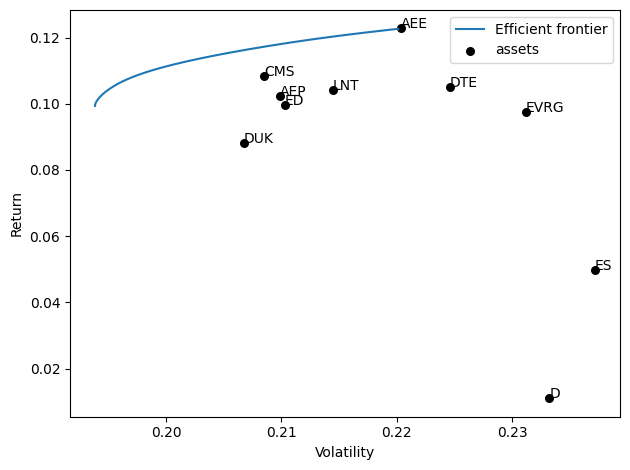

In [16]:
MVOPlotEfficientFrontier(prices = prices)

In [17]:
weightsPlot(MVOTangentPortfolio(prices=prices), kind = "pie")

Expected annual return: 11.8%
Annual volatility: 20.9%
Sharpe Ratio: 0.56
(np.float64(0.11752375919079204), np.float64(0.20900258091108892), np.float64(0.5623076934192857))


<Axes: xlabel='Volatility', ylabel='Return'>

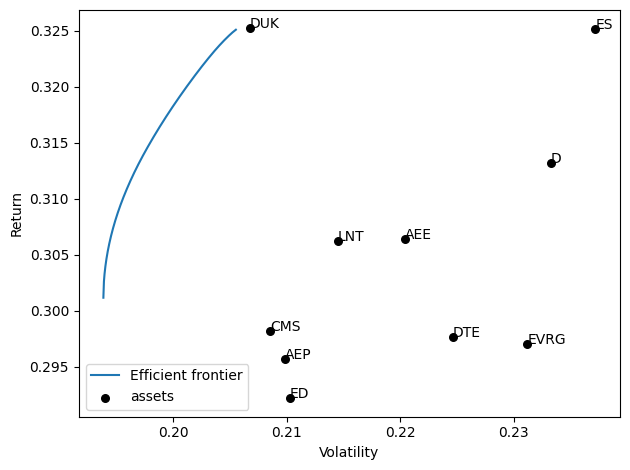

In [25]:
blackLittermanAbsoluteViewsPlotEfficientFrontier(prices = prices, views = OrderedDict({"DUK": 0.5}))